In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
import missingno as msno
% matplotlib inline
% config InlineBackend.figure_format='retina'

sns.set()


In [3]:
# 保存subgroup
def save_subgroup(dataframe, g_index, subgroup_name, path, prefix="raw_"):
    save_subgroup_filename = path + prefix + subgroup_name + ".csv.gz"
    print("save filename:", save_subgroup_filename)
    dataframe.to_csv(save_subgroup_filename, compression="gzip", encoding="UTF-8")

    test_df = pd.read_csv(save_subgroup_filename, compression="gzip", index_col=g_index, encoding="UTF-8")

    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")


In [4]:
# 读取subgroup
def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression="gzip", index_col=index_col)


In [6]:
# 读取数据
clean_players = load_subgroup(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\cleaned_players.csv.gz")
players = load_subgroup("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\raw_players.csv.gz")
countries = load_subgroup("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\raw_countries.csv.gz")
referees = load_subgroup("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\raw_referees.csv.gz")
agg_dyads = pd.read_csv("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\raw_dyads.csv.gz",
                        compression='gzip', index_col=[0, 1])
tidy_dyads = pd.read_csv("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\cleaned_dyads.csv.gz",
                         compression='gzip', index_col=[0, 1])


In [7]:
clean_players[:5]


,height,weight,skintone,position_agg,weightclass,heightclass,skintoneclass,age_years
playerShort,,,,,,,,
aaron-hughes,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hunt,183.0,73.0,0.125,Forward,low_weight,mid_height,"(-0.001, 0.125]",26.327173
aaron-lennon,165.0,63.0,0.250,Midfield,vlow_weight,vlow_height,"(0.125, 0.25]",25.713895
aaron-ramsey,178.0,76.0,0.000,Midfield,mid_weight,low_height,"(-0.001, 0.125]",22.017796
abdelhamid-el-kaoutari,180.0,73.0,0.250,Defense,low_weight,low_height,"(0.125, 0.25]",22.795346


In [10]:
temp = tidy_dyads.reset_index().set_index('playerShort').merge(clean_players, left_index=True, right_index=True)
print(temp.shape)
temp[:5]


(373067, 10)


,refNum,redcard,height,weight,skintone,position_agg,weightclass,heightclass,skintoneclass,age_years
playerShort,,,,,,,,,,
aaron-hughes,4,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,66,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,77,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,77,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,77,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897


In [11]:
tidy_dyads.head()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>redcard</th>
    </tr>
    <tr>
      <th>refNum</th>
      <th>playerShort</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <th>lucas-wilchez</th>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <th>john-utaka</th>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">4</th>
      <th>aaron-hughes</th>
      <td>0</td>
    </tr>
    <tr>
      <th>aleksandar-kolarov</th>
      <td>0</td>
    </tr>
    <tr>
      <th>alexander-tettey</th>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [12]:
# 查看给了最多红牌的裁判
(tidy_dyads.groupby(level=0)
 .sum()
 .sort_values('redcard', ascending=False)
 .rename(columns={'redcard': 'total redcards given'})).head()


,total redcards given
refNum,
468,49
432,49
449,47
916,42
2073,36


In [14]:
# 查看得到了最多红牌的球员
(tidy_dyads.groupby(level=1)
 .sum()
 .sort_values('redcard', ascending=False)
 .rename(columns={'redcard': 'total redcards received'})).head()


,total redcards received
playerShort,
cyril-jeunechamp,19
sergio-ramos,19
gary-medel,16
ballesteros,15
juanfran,15


In [16]:
total_ref_games = tidy_dyads.groupby(level=0).size().sort_values(ascending=False)
total_ref_games.head()


refNum
1214    5598
2080    4773
1942    4469
2398    4363
3099    4087
dtype: int64

In [17]:
total_player_games = tidy_dyads.groupby(level=1).size().sort_values(ascending=False)
total_ref_games.head()


refNum
1214    5598
2080    4773
1942    4469
2398    4363
3099    4087
dtype: int64

In [18]:
total_ref_given = tidy_dyads.groupby(level=0).sum().sort_values(ascending=False, by='redcard')
total_player_received = tidy_dyads.groupby(level=1).sum().sort_values(ascending=False, by='redcard')


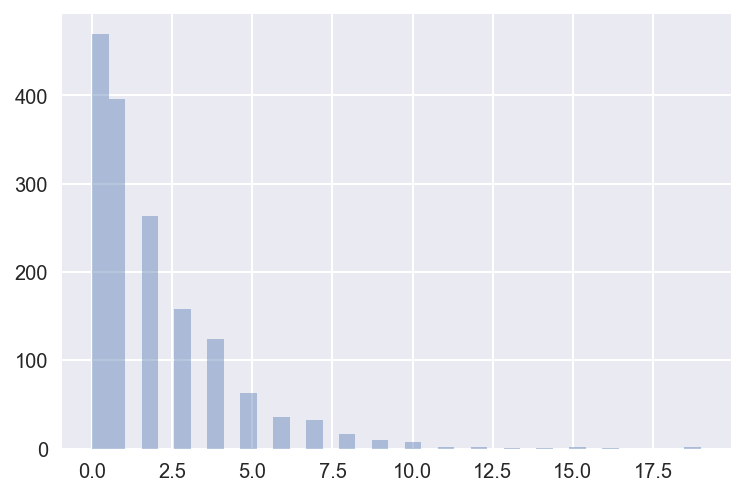

In [20]:
sns.distplot(total_player_received, kde=False)

# 可以看到球员得到红牌数据的分布


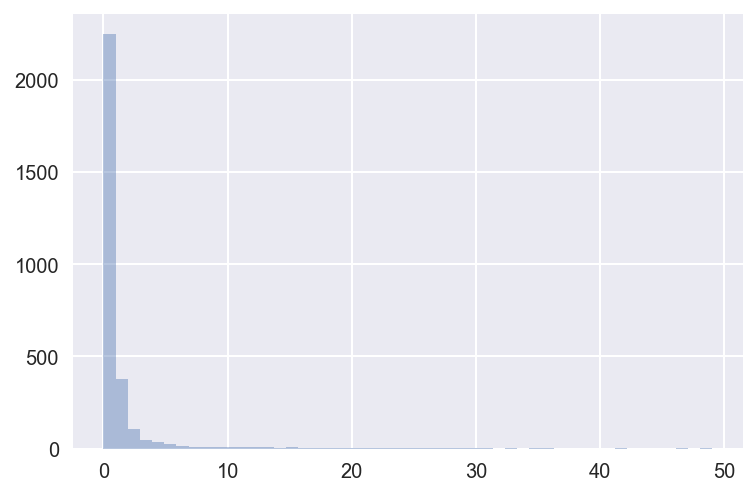

In [21]:
sns.distplot(total_ref_given, kde=False)

# 可以看到裁判给出红牌的分布情况


In [23]:
player_ref_game = (tidy_dyads.reset_index()
                   .set_index('playerShort')
                   .merge(clean_players,
                          left_index=True,
                          right_index=True)
                   )
player_ref_game[:5]


,refNum,redcard,height,weight,skintone,position_agg,weightclass,heightclass,skintoneclass,age_years
playerShort,,,,,,,,,,
aaron-hughes,4,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,66,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,77,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,77,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897
aaron-hughes,77,0,182.0,71.0,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]",33.149897


In [24]:
bootstrap = pd.concat([player_ref_game.sample(replace=True,
                                              n=10000).groupby('skintone').mean()
                       for _ in range(100)])


In [25]:
player_ref_game.sample(replace=True, n=10000).groupby('skintone').mean()


,refNum,redcard,height,weight,age_years
skintone,,,,,
0.000,1526.769659,0.007418,182.543027,76.338794,28.026874
0.125,1465.499652,0.006272,182.770035,76.046722,28.296066
0.250,1495.117901,0.010494,181.559877,76.355597,29.243626
0.375,1273.762238,0.011655,181.585082,76.911422,28.906931
0.500,1543.143505,0.007553,181.345921,75.366819,27.941219
0.625,1532.744681,0.000000,182.888298,75.526596,27.403877
0.750,1560.355872,0.012456,180.503559,75.946140,27.373656
0.875,1676.647826,0.008696,182.886957,78.121739,27.881046
1.000,1553.584229,0.005376,181.935484,76.290614,28.506512


Text(0.5,0,'Skintone')

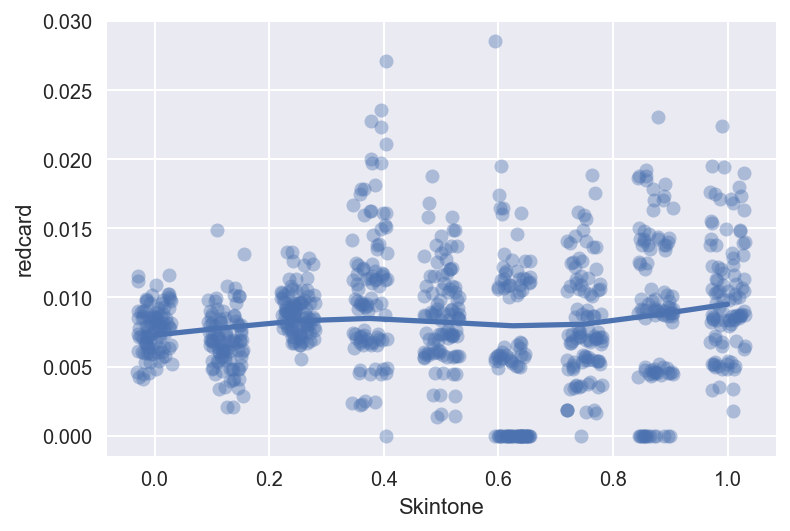

In [30]:
ax = sns.regplot(bootstrap.index.values,
                 y='redcard',
                 data=bootstrap,

                 lowess=True,
                 scatter_kws={'alpha': 0.4, },
                 x_jitter=(0.125 / 4.0))
ax.set_xlabel("Skintone")

# 可以看到，在黑人，白人的部分，在skintone越大的时候，有个别的裁判，会超出平均值
# 所以skintone还是会有影响的
